In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from models import Model
from layers import Embedding, Flatten, Dense

In [2]:
categories = ['sci.space', 'rec.sport.baseball', 'comp.graphics']
from sklearn.feature_extraction.text import CountVectorizer
data = fetch_20newsgroups(subset='train', categories=categories)
df = pd.DataFrame({
    'text': data.data,
    'target': data.target,
})
df.head()

,text,target
0,From: jk87377@lehtori.cc.tut.fi (Kouhia Juhana...,0
1,From: jbulf@balsa.Berkeley.EDU (Jeff Bulf)\nSu...,0
2,From: jrogoff@scott.skidmore.edu (jay rogoff)\...,1
3,From: kwp@wag.caltech.edu (Kevin W. Plaxco)\nS...,2
4,From: sbp002@acad.drake.edu\nSubject: Re: Brav...,1


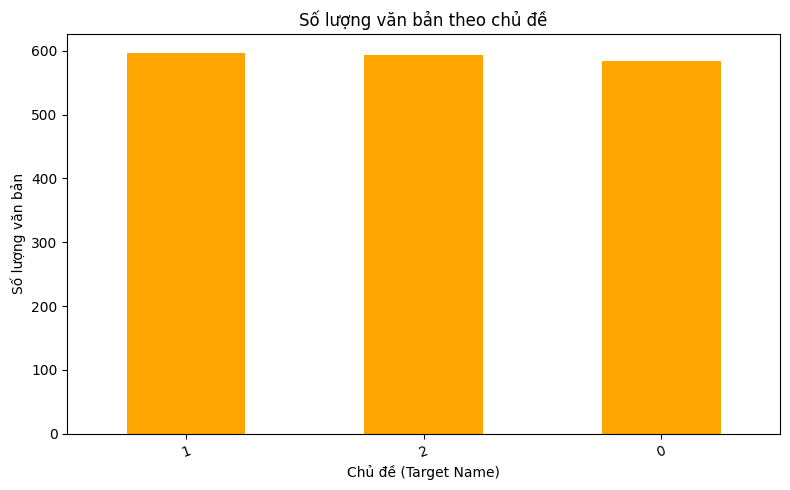

In [3]:
counts = df['target'].value_counts()

# Bước 3: Vẽ biểu đồ
plt.figure(figsize=(8, 5))
counts.plot(kind='bar', color='orange')
plt.title('Số lượng văn bản theo chủ đề')
plt.xlabel('Chủ đề (Target Name)')
plt.ylabel('Số lượng văn bản')
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

In [4]:
from sklearn.preprocessing import LabelBinarizer
vectorizer  = CountVectorizer(max_features=1000, token_pattern=r'\b\w+\b')
vectorizer.fit(df['text'])
vocab = vectorizer.vocabulary_
vocab_size = len(vocab)

def encode(text, maxlen=20):
    tokens = text.lower().split()
    ids = [vocab.get(tok, 0) for tok in tokens[:maxlen]]
    return ids + [0] * (maxlen - len(ids)) 
X = np.array([encode(t) for t in df['text']]) 
y = LabelBinarizer().fit_transform(df['target']) 


In [5]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       ...,
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0]])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [44]:
class MyModel(Model):
    def __init__(self, vocab_size, embedding_dim=16):
        super().__init__()
        self.embedding = Embedding(vocab_size=vocab_size, embedding_dim=embedding_dim)
        self.flatten = Flatten()
        self.dense1 = Dense(32, activation='relu')
        self.dense2 = Dense(3, activation='softmax')

    def call(self, inputs):
        x = self.embedding.forward(inputs)
        x = self.flatten.forward(x)
        x = self.dense1.forward(x)
        x = self.dense2.forward(x)
        return x

In [ ]:
model = MyModel(vocab_size=1000, embedding_dim=16)
model.fit(X_train, y_train, batch_size=16, epochs=300, learning_rate=0.01)

Epoch: 1/200 ==========================> 88/88 steps. loss 1.1122514460112691
Epoch: 2/200 ==========================> 88/88 steps. loss 1.1111143054566524
Epoch: 3/200 ==========================> 88/88 steps. loss 1.1102426564753494
Epoch: 4/200 ==========================> 88/88 steps. loss 1.1093556215657214
Epoch: 5/200 ==========================> 88/88 steps. loss 1.1084863361092692
Epoch: 6/200 ==========================> 88/88 steps. loss 1.1076134963170814
Epoch: 7/200 ==========================> 88/88 steps. loss 1.1067506634980866
Epoch: 8/200 ==========================> 88/88 steps. loss 1.1058879134661952
Epoch: 9/200 ==========================> 88/88 steps. loss 1.1049463221053866
Epoch: 10/200 ==========================> 88/88 steps. loss 1.1039576715792223
Epoch: 11/200 ==========================> 88/88 steps. loss 1.1028163460068139
Epoch: 12/200 ==========================> 88/88 steps. loss 1.1015650102939603
Epoch: 13/200 ==========================> 88/88 steps. loss 1

In [46]:
preds = model.call(X_test)
pred_labels = np.argmax(preds, axis=1)
true_labels = np.argmax(y_test, axis=1)

In [47]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(true_labels, pred_labels))

Test Accuracy: 0.7690140845070422
